In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.fft import fft2, ifft2

In [2]:
def fft_correl2d(x,y):
    """ 2D correlation, using FFT"""
    fr = fft2(x)
    fr2 = fft2(y[::-1,::-1])
    m,n = fr.shape
    cc = np.real(ifft2(fr*fr2))
    cc = np.roll(cc, int(-m/2+1),axis=0)
    cc = np.roll(cc, int(-n/2+1),axis=1)
    return cc

In [3]:
L = 100
t = 10
rhos = pd.read_csv('data/hydro_j' + str(L) + 'by' + str(L) + 't' + str(t) + '.dat', header=None, skiprows=1).to_numpy()[:, :-1]
rhos = rhos.reshape((-1, L, L)).astype(int)

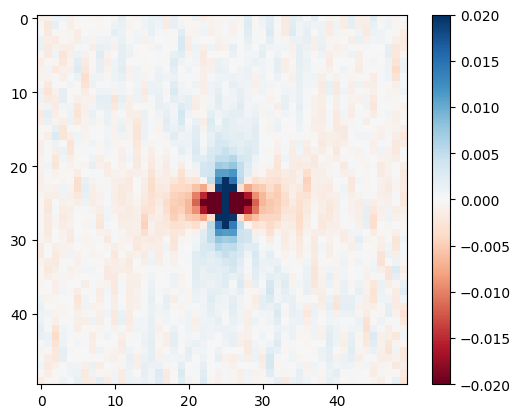

In [4]:
totals = np.zeros((L,L))
obs1 = L-np.abs(np.arange(-L+1,L))
obs2 = np.outer(obs1,obs1)
for i in range(len(rhos) - 1):
    totals += fft_correl2d(rhos[i], rhos[i])
totals = totals / len(rhos) / obs2[int(L/2):int(L/2)+L, int(L/2):int(L/2)+L]
plt.imshow(totals[int(L/4):int(3*L/4),int(L/4):int(3*L/4)], cmap='RdBu', vmax = .02, vmin = -.02)
plt.colorbar()
plt.show()

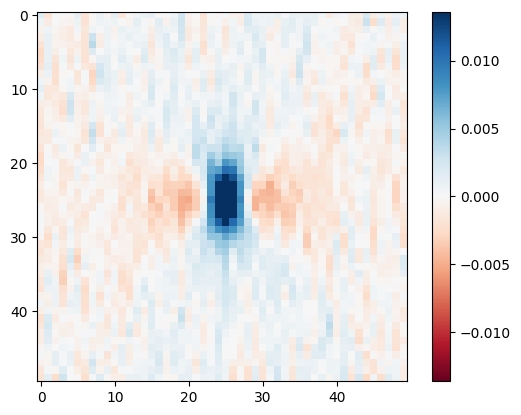

In [5]:
totals = np.zeros((L,L))
obs1 = L-np.abs(np.arange(-L+1,L))
obs2 = np.outer(obs1,obs1)
for i in range(len(rhos) - 1):
    totals += fft_correl2d(rhos[i], rhos[i+1])
totals = totals / len(rhos) / obs2[int(L/2):int(L/2)+L, int(L/2):int(L/2)+L]
plt.imshow(totals[int(L/4):int(3*L/4),int(L/4):int(3*L/4)], cmap='RdBu', vmax = np.amax(totals)/2, vmin = -np.amax(totals)/2)
plt.colorbar()
plt.show()